In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import numpy as np 
import pandas as pd


In [2]:
data = pd.read_csv('train.csv')
data.shape

(891, 12)

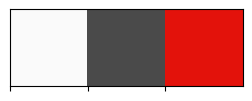

In [3]:
sns.palplot(['#fafafa', '#4a4a4a', '#e3120b'])

C:\Users\Viraj\AppData\Local\Temp\ipykernel_13928\3629566532.py:45: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(timeline_sub_x, levels, use_line_collection=True)


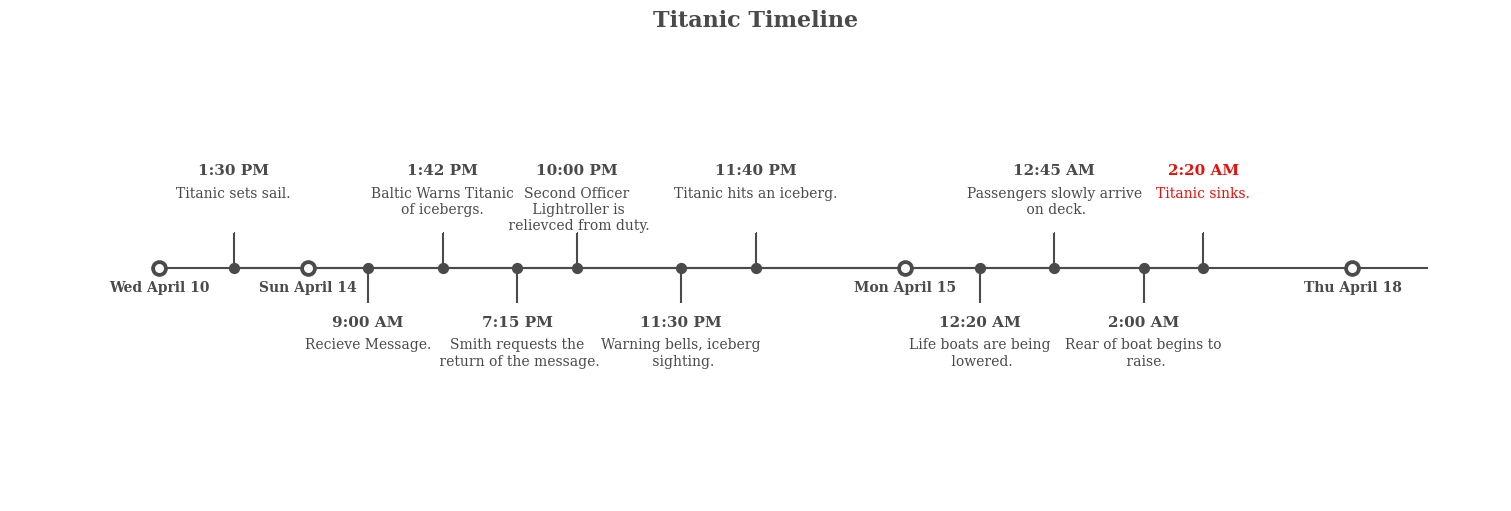

In [4]:
from datetime import datetime

timeline_dates = ["Wed April 10", "Sun April 14", "Mon April 15", "Thu April 18"]

timeline_x = [1, 2, 6, 9]

timeline_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]

timeline_sub_times = ["1:30 PM", "9:00 AM", "1:42 PM", "7:15 PM", "10:00 PM", "11:30 PM", "11:40 PM", "12:20 AM", "12:45 AM", "2:00 AM", "2:20 AM"]

timeline_text = ["Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."]

fig,ax = plt.subplots(figsize=(15,5), constrained_layout = True)
ax.set_ylim(-2,2)
ax.set_xlim(0,10)

#Timeline: Line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)

#Timeline: Date Points
ax.scatter(timeline_x, np.zeros(len(timeline_x)), s =120, c='#4a4a4a', zorder=2)
ax.scatter(timeline_x, np.zeros(len(timeline_x)), s =30, c='#fafafa', zorder=3)

# Timeline : Time Points
ax.scatter(timeline_sub_x, np.zeros(len(timeline_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x,date in zip(timeline_x,timeline_dates):
    ax.text(x, -0.2, date, ha='center', fontfamily='serif', fontweight='bold', color='#4a4a4a')
    
# Stemplot : vertical line
levels = np.zeros(len(timeline_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(timeline_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder   =0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a') 

# Text
for idx,x,time,txt in zip(range(1, len(timeline_sub_x)+1), timeline_sub_x, timeline_sub_times, timeline_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', fontfamily='serif', fontweight='bold', color='#4a4a4a' if idx!=len(timeline_sub_x) else '#e3120b', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', fontfamily='serif',color='#4a4a4a' if idx!=len(timeline_sub_x) else '#e3120b')
    
# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([])

# Title
ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()

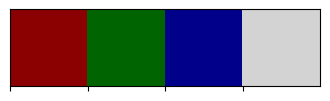

In [5]:
sns.palplot(["darkred", "darkgreen", "darkblue", "lightgrey"])

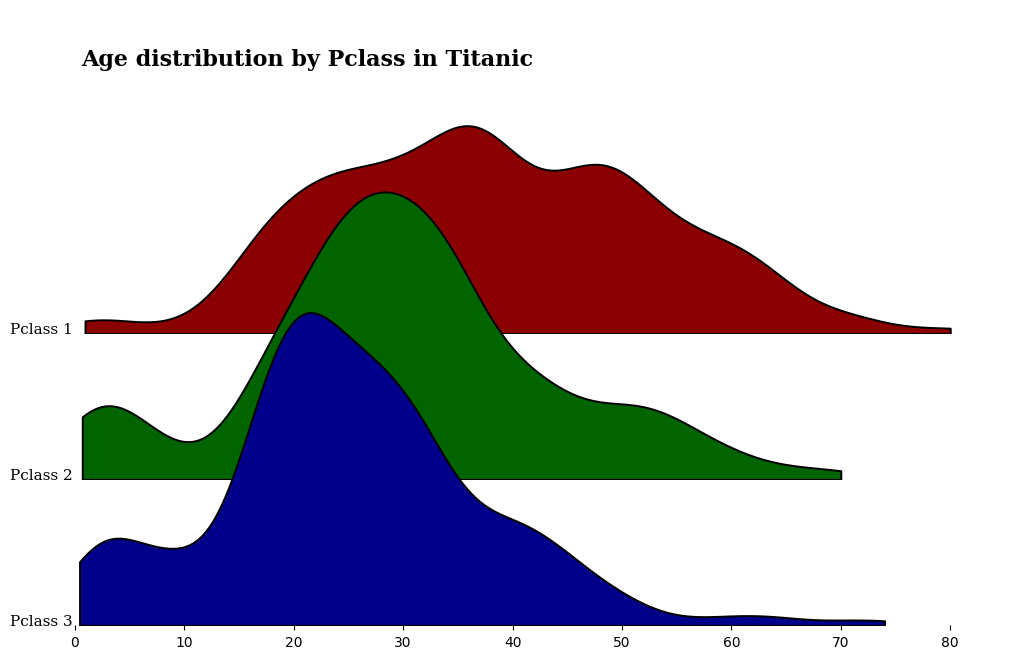

In [6]:
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors =["darkred", "darkgreen", "darkblue"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    sns.kdeplot(x='Age', data=data[data['Pclass']==cls], fill=True, ax=axes[idx], cut=0, bw_method=0.25, lw=1.4, edgecolor='black', color=c, alpha=1)
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx!=2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines= ["top", "right", "left", "bottom"]
    for s in spines :
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2, 0, f'Pclass {cls}', fontweight="light", fontfamily='serif', fontsize=11, ha="right")
    
fig.text(0.13, 0.81, "Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

In [7]:
sns.color_palette(sns.color_palette("Greens",2))

[(0.681045751633987, 0.8718954248366013, 0.6562091503267974),
 (0.21568627450980393, 0.6287581699346405, 0.3333333333333333)]

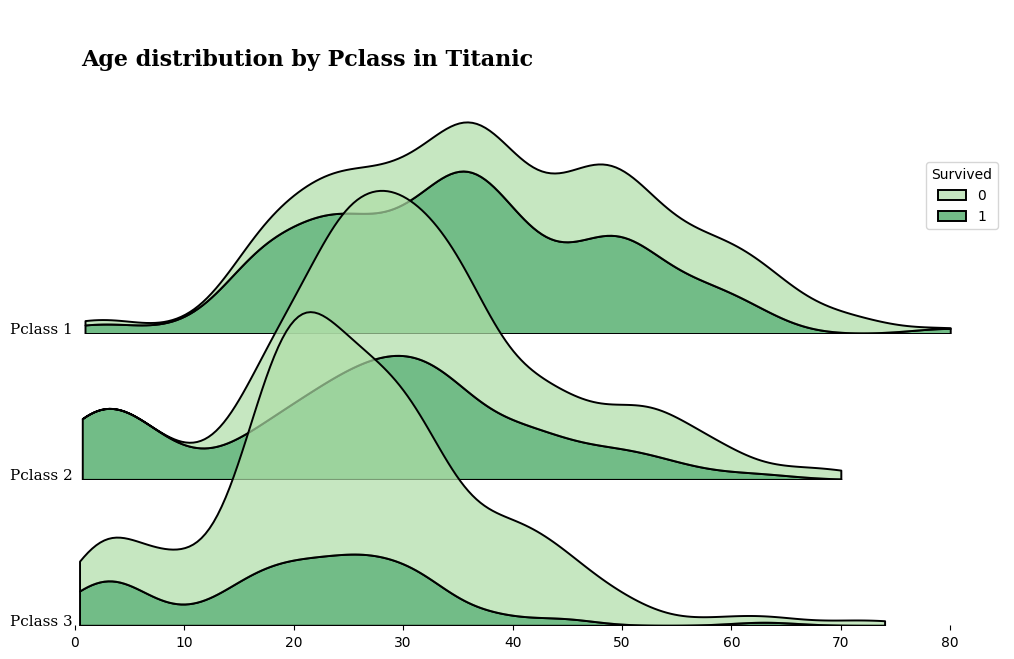

In [8]:
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,1)
gs.update(hspace=-0.55)

axes=list()
colors =["darkred", "darkgreen", "darkblue"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()),colors) :
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    sns.kdeplot(x = 'Age', data=data[data['Pclass']==cls], fill=True, ax=axes[idx], cut=0, bw_method=0.25, lw=1.4, edgecolor='black', hue='Survived', multiple="stack", palette='Greens', alpha=0.7)
    
    axes[idx].set_ylim(0, 0.04) 
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('') 
    axes[idx].set_xlabel('')
    
    spines = ["top", "right", "left", "bottom"]
    for s in spines :
        axes[idx].spines[s].set_visible(False)
    
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2, 0, f'Pclass {cls}', fontweight="light", fontfamily='serif', fontsize=11, ha="right")
    if idx != 1 : axes[idx].get_legend().remove()

fig.text(0.13, 0.81, "Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

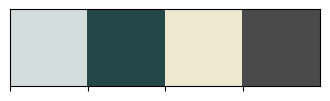

In [9]:
sns.palplot(['#d4dddd', '#244747', '#efe8d1', '#4a4a4a'])

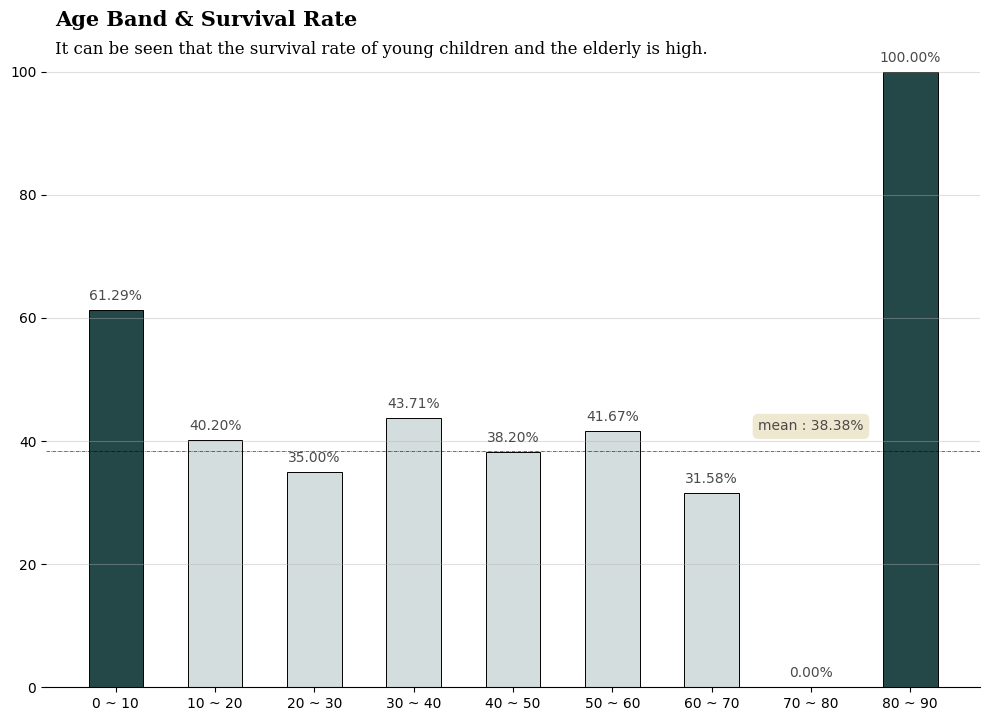

In [10]:
def age_band(num) :
    for i in range(1, 100) :
        if num < 10*i : return f'{(i-1)*10} ~ {i*10}'

data['age_band'] = data ['Age'].apply(age_band)
titanic_age = data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1])*100

fig,ax = plt.subplots(1, 1, figsize=(10,7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747'

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], color = color_map, width=0.55, edgecolor='black', linewidth=0.7)

for s in ["top", "right", "left"] :
    ax.spines[s].set_visible(False)

for i in titanic_age['Survival rate'].index :
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", xy=(i, titanic_age['Survival rate'][i] + 2.3), va = 'center', ha = 'center', fontweight='light', color='#4a4a4a')
    
mean = data['Survived'].mean()*100
ax.axhline(mean, color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", xy=('70 ~ 80', mean + 4), va ='center', ha ='center', color='#4a4a4a', bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0,101,20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

In [11]:
survival_rate = data.groupby(['Sex']).mean(numeric_only=True)[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
male_pos = np.random.uniform(0, male_rate, len(data[(data['Sex']=='male') & (data['Survived']==1)]))
male_neg = np.random.uniform(1, male_rate, len(data[(data['Sex']=='male') & (data['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(data[(data['Sex']=='female') & (data['Survived']==1)]))
female_neg = np.random.uniform(1, female_rate, len(data[(data['Sex']=='female') & (data['Survived']==0)]))

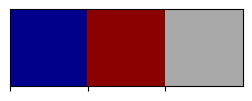

In [13]:
sns.palplot(['darkblue', 'darkred', 'darkgrey'])

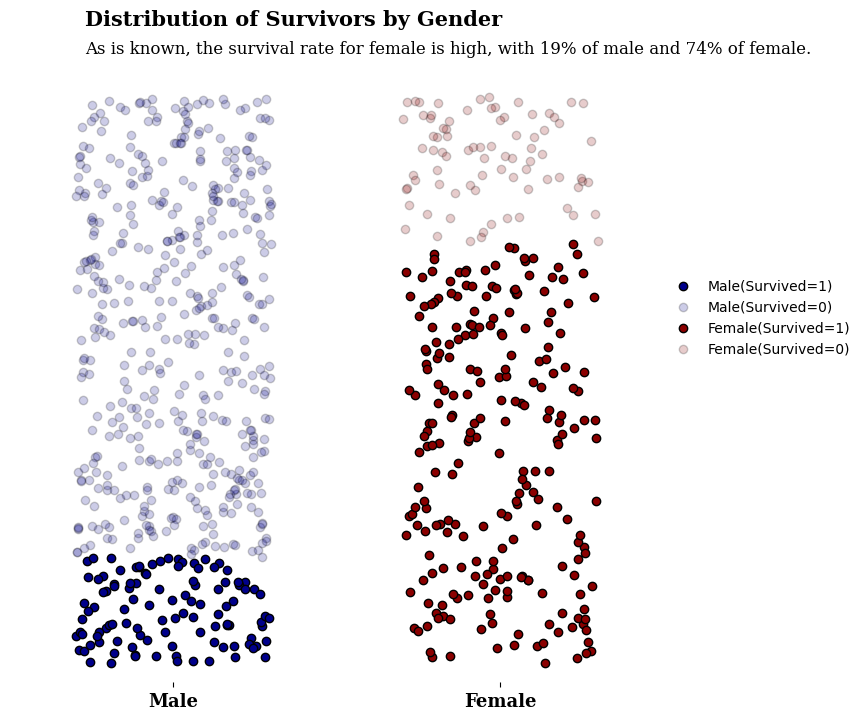

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='darkblue', edgecolor='black', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='darkblue', edgecolor='black', alpha=0.2, label='Male(Survived=0)')

ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='darkred', edgecolor='black', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='darkred', edgecolor='black', alpha=0.2, label='Female(Survived=0)')

ax.set_xlim([-0.5, 2.0])
ax.set_ylim([-0.03, 1.1])

ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

for s in ["top", "right", "left", "bottom"] :
    ax.spines[s].set_visible(False)
    
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

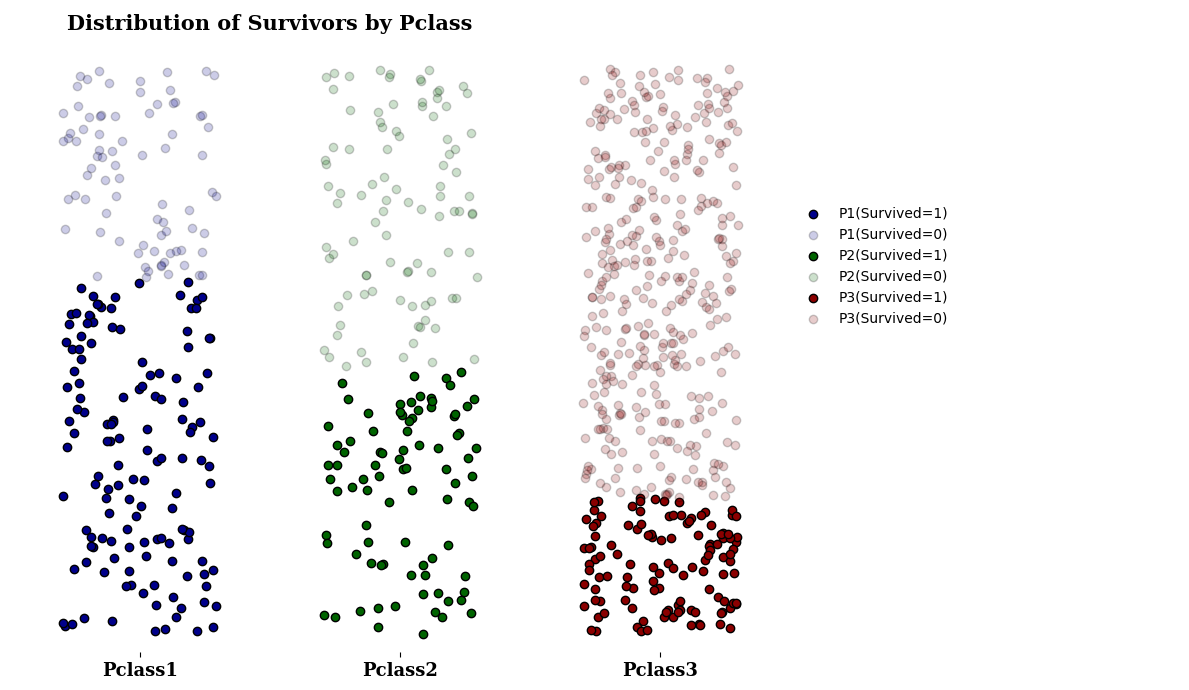

In [15]:
survival_rate = data.groupby(['Pclass']).mean(numeric_only=True)[['Survived']]
p1_rate = survival_rate.loc[1]
p2_rate = survival_rate.loc[2]
p3_rate = survival_rate.loc[3]

p1_pos = np.random.uniform(0, p1_rate, len(data[(data['Pclass']==1) & (data['Survived']==1)]))
p1_neg = np.random.uniform(1, p1_rate, len(data[(data['Pclass']==1) & (data['Survived']==0)]))
p2_pos = np.random.uniform(0, p2_rate, len(data[(data['Pclass']==2) & (data['Survived']==1)]))
p2_neg = np.random.uniform(1, p2_rate, len(data[(data['Pclass']==2) & (data['Survived']==0)]))
p3_pos = np.random.uniform(0, p3_rate, len(data[(data['Pclass']==3) & (data['Survived']==1)]))
p3_neg = np.random.uniform(1, p3_rate, len(data[(data['Pclass']==3) & (data['Survived']==0)]))

fig, ax = plt.subplots(1, 1, figsize=(12,7))

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), p1_pos, color='darkblue', edgecolor='black', label='P1(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), p1_neg, color='darkblue', edgecolor='black', alpha=0.2, label='P1(Survived=0)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), p2_pos, color='darkgreen', edgecolor='black', label='P2(Survived=1)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), p2_neg, color='darkgreen', edgecolor='black', alpha=0.2, label='P2(Survived=0)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), p3_pos, color='darkred', edgecolor='black', label='P3(Survived=1)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), p3_neg, color='darkred', edgecolor='black', alpha=0.2, label='P3(Survived=0)')

ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Pclass1', 'Pclass2', 'Pclass3'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

for s in ["top", "right", "left", "bottom"] :
    ax.spines[s].set_visible(False)
    
fig.text(0.06, 0.95, 'Distribution of Survivors by Pclass', fontweight='bold', fontfamily='serif', fontsize=15, ha='left')

ax.legend(loc=(0.67, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

In [16]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
data['Family'] = data['SibSp'] + data['Parch']
data = data[[col for col in data.columns if col !='Survived']+['Survived']]
corr = data.corr(numeric_only=True)
corr

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Survived
PassengerId,1.000000,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030467,-0.040143,-0.005007
Pclass,-0.035144,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.045702,0.065997,-0.338481
Sex,-0.042939,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.116569,0.200988,0.543351
Age,0.036847,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.010171,-0.301914,-0.077221
SibSp,-0.057527,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059961,0.890712,-0.035322
Parch,-0.001652,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.078665,0.783111,0.081629
Fare,0.012658,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.062142,0.217138,0.257307
Embarked,-0.030467,0.045702,0.116569,0.010171,-0.059961,-0.078665,0.062142,1.000000,-0.080281,0.106811
Family,-0.040143,0.065997,0.200988,-0.301914,0.890712,0.783111,0.217138,-0.080281,1.000000,0.016639
Survived,-0.005007,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.106811,0.016639,1.000000


In [17]:
sns.color_palette(sns.diverging_palette(230, 20))

[(0.2509335357076959, 0.4944143311197457, 0.6104170295454565),
 (0.5266567751883763, 0.6751928585334119, 0.7467240840661897),
 (0.8050726244296104, 0.8577368012538521, 0.884362262166227),
 (0.9140860646530862, 0.8246826885128927, 0.8028133239419792),
 (0.8384144678873866, 0.5785740917778832, 0.5129511551488873),
 (0.7634747047461135, 0.3348456555528834, 0.225892295531744)]

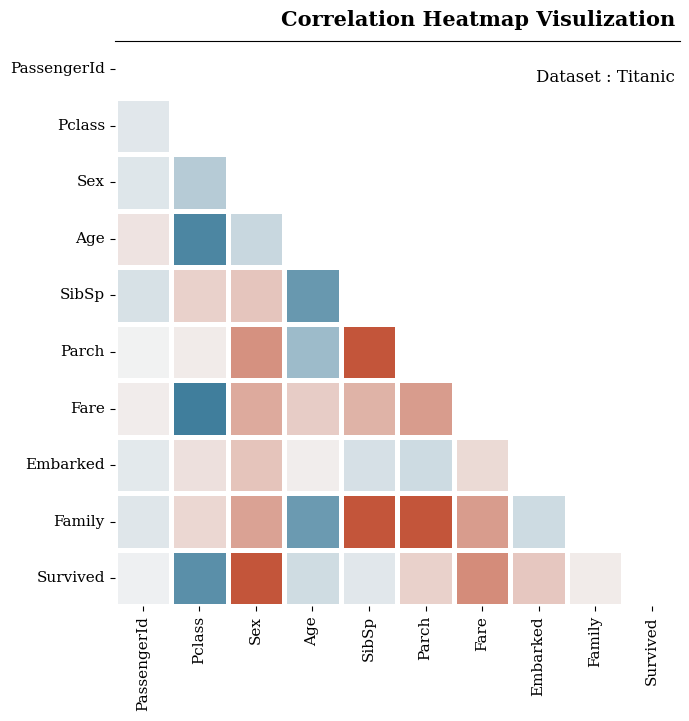

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

mask = np.zeros_like(corr, dtype=np)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, square=True, mask=mask, linewidth=2.5, vmax=0.4, vmin=-0.4, cmap=cmap, cbar=False, ax=ax)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1, 'Correlation Heatmap Visulization', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')
fig.text(0.97, 0.92, 'Dataset : Titanic', fontweight='light', fontfamily='serif', fontsize=12, ha='right')

plt.tight_layout()
plt.show()

In [75]:
from umap import umap_ as UMAP

survived = data['Survived']
data_sub = data.drop(['Survived', 'Ticket', 'Name', 'Cabin', 'age_band'], axis=1).fillna(0)

umap = UMAP.UMAP(random_state=0)
titanic_umap = umap.fit_transform(data_sub, survived)


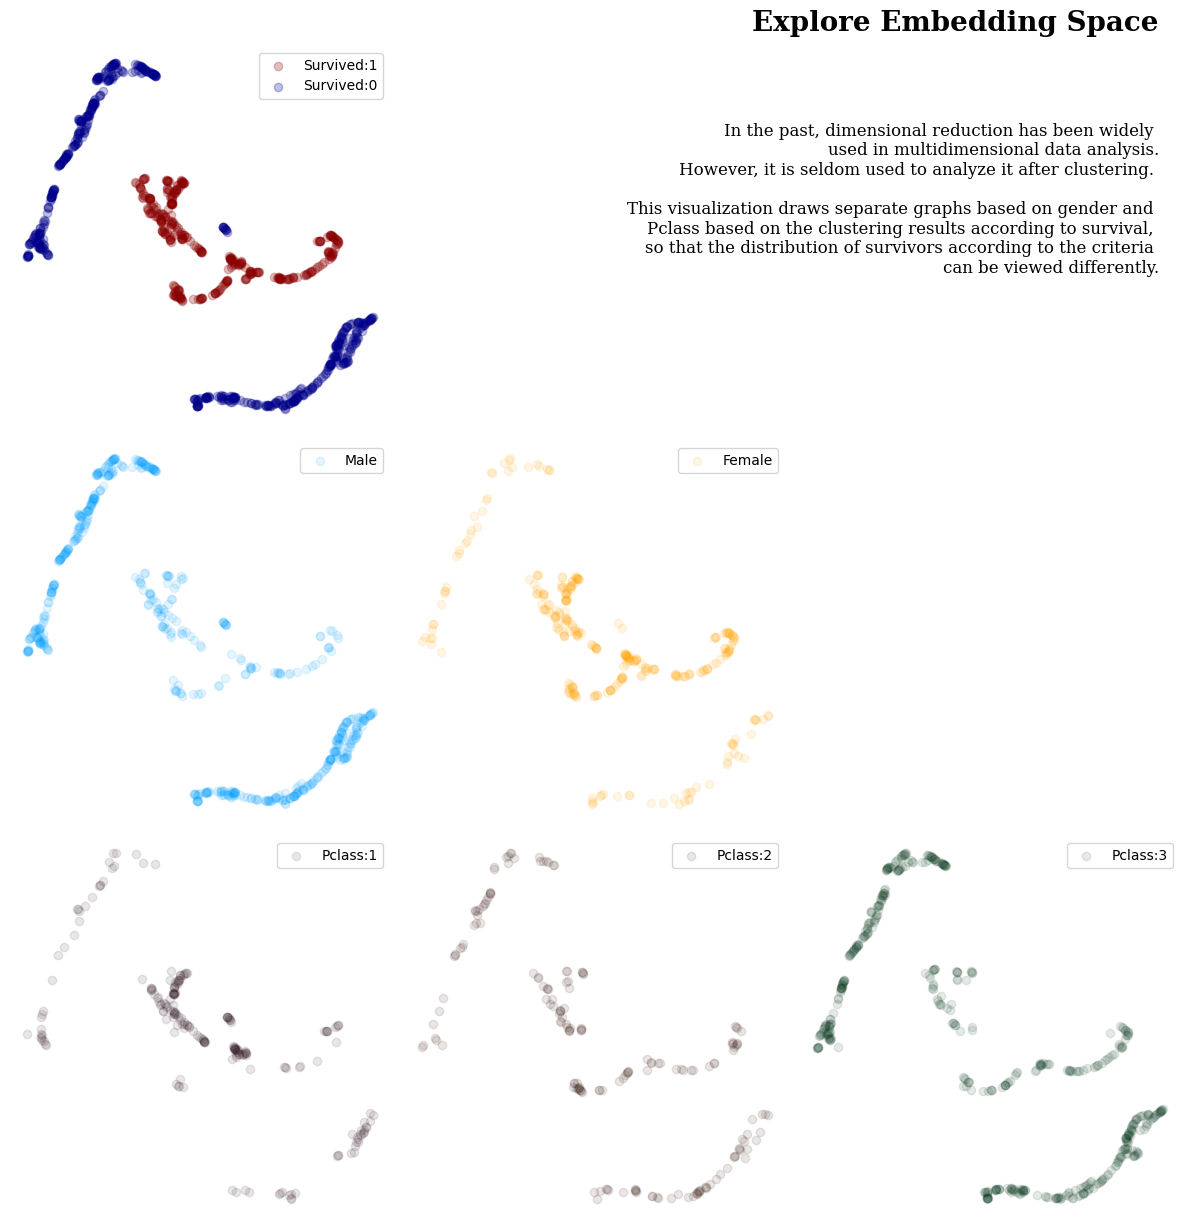

In [110]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

axes[0][0].scatter(titanic_umap[data['Survived']==1][:,0], titanic_umap[data['Survived']==1][:,1], c='darkred', alpha=0.25, label='Survived:1')
axes[0][0].scatter(titanic_umap[data['Survived']==0][:,0], titanic_umap[data['Survived']==0][:,1], c='darkblue', alpha=0.25, label='Survived:0')

axes[1][0].scatter(titanic_umap[data['Sex']==0][:,0], titanic_umap[data['Sex']==0][:,1], c='#009FFD', alpha=0.1, label='Male')
axes[1][1].scatter(titanic_umap[data['Sex']==1][:,0], titanic_umap[data['Sex']==1][:,1], c='#FFA400', alpha=0.1, label='Female')

axes[2][0].scatter(titanic_umap[data['Pclass']==1][:,0], titanic_umap[data['Pclass']==1][:,1], c='#2C1320', alpha=0.1, label='Pclass:1')
axes[2][1].scatter(titanic_umap[data['Pclass']==2][:,0], titanic_umap[data['Pclass']==2][:,1], c='#2E0E02', alpha=0.1, label='Pclass:2')
axes[2][2].scatter(titanic_umap[data['Pclass']==3][:,0], titanic_umap[data['Pclass']==3][:,1], c='#06371B', alpha=0.1, label='Pclass:3')

for i in range(3) :
    for j in range(3) :
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        for s in ["top", "right", "left", "bottom"] :
            axes[i][j].spines[s].set_visible(False)
        if j<=i : axes[i][j].legend()
        
fig.text(0.97, 1, 'Explore Embedding Space', fontweight='bold', fontfamily='serif', fontsize=20, ha='right')
fig.text(0.97, 0.94, '''
In the past, dimensional reduction has been widely 
used in multidimensional data analysis.
However, it is seldom used to analyze it after clustering. 

This visualization draws separate graphs based on gender and 
Pclass based on the clustering results according to survival, 
so that the distribution of survivors according to the criteria 
can be viewed differently.''', fontweight='light', fontfamily='serif', fontsize=12, va='top', ha='right')

plt.tight_layout()
plt.show()